# DSCI 100 Final Project: Group 28 | Ann Huynh, Francis Cho, Raymond Liu, Ainsley Jordan

## Introduction

A research group in Computer Science at UBC, the Pacific Laboratory for Artificial Intelligence (PLAI), is collecting data about how people play video games. To understand how to best target their recruitment efforts, they seek to understand: “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?”

To help answer this broad question, our project aims to explore the effect of two specific player variables: **Can a player’s age and number of hours played predict whether they are subscribed to a video game-related newsletter?** We will be using data collected by PLAI tracking players on a Minecraft server. 

Using the data collected by PLAI by allowing players to sign up for a multiplayer server for the game Minecraft and have their data studied. This was done by the designed PLAICraft dataset that records streams of screen video, game output audio, player input audio, and the precise movements of the players mouse and keyboard while they played. Players were instructed to play normally in the multiplayer server, while all modalities were recorded. The specific details were recorded “in order to study the skills like object permanence, reactive speech, memory, and social reasoning" (He 3). This allowed the dataset to be trained on real social interactions between players so that it can embody real world scenarios.

Only the players dataset was used for this project. There are 196 observations representing 196 players’ data, and seven variables: experience, subscribe, hashedEmail, played_hours, name, gender, and Age.


|Variables|Description|Average|
|:-------:|:---------:|:------|
|Experience|refers to the level of play each user is accustomed to (Beginner, Amateur, Regular, Veteran, and Pro)|(N/A)|
|Subscription| describes whether or not each user is subscribed to a game-related newspaper as `TRUE`/`FALSE`| (N/A)|
|hashedEmail| holds each user’s email |(N/A)|
|Name|describes each user’s name they use|(N/A)|
|Age|refers to the age the users report for themselves|21.14|
|Gender| describes how the user identifies (Agender, Female, Male, Non-binary, Other, Prefer not to say, or Two-Spirited)|(N/A)|
|played_hours| states how many hours each user has played on the server|5.85|

## Methods
A KNN classification is being used to answer the question. This is appropriate because it would provide a clear visual answer to a prediction question, k-nn allows us to see whether based on age and hours how likely they are to be subscribed based on the values of other players. No clear trend appears immediately in the data between age/hours played and subscription, so a linear regression model may not be appropriate. To do this, the data must be scaled and then split into testing and training sets (30/70 split). Accuracy, precision, and recall are determined and a confusion matrix will be used to evaluate the models performance. Tuning will then determine what the optimal k value is. KNN with the optimal k will then be performed and visualized, which should result in a model that can predict if a player will subscribe based on their age and hours played. The libraries tidyverse, repr, and tidymodels will be used.

## Results

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url_players <- "https://raw.githubusercontent.com/annhuynhh/dsci_group_final_project/refs/heads/main/players.csv"

players_data <- read_csv(url_players)
    
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Only PLAI's dataset `players.csv` (which is fully described above) was used for this project. The entire datset is initially loaded in here to then be wrangled and tidied.

In [3]:
#insert markdown table describing data around here

averages <- players_data|>
    summarize(avg_hrs = mean(played_hours), avg_age = mean(Age, na.rm = TRUE))
averages

avg_hrs,avg_age
<dbl>,<dbl>
5.845918,21.13918


The mean values of `age` and `played_hours` are important to record here because they can be used later to compare the final results to. These numbers reflect the mean of the variables we are trying to use to predict whether or not subscription to a newsletter can be based on plays age and how many hours they played. 

In [4]:
#wrangling and cleaning data

#selecting only for variables we're interested in to answer our question
players <- players_data |>
     select(subscribe, played_hours, Age)|>
     drop_na(Age, played_hours)|>
     mutate(subscribe = as_factor(subscribe))

head(players)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


The dataset is wrangled and cleaned. The variable subscription is changed from a logical value to a factor. NA is also dropped in `age` and `played_hours` because if it was left in the machine learning algorithm would not run properly and cause errors. Only the variables we're interested in to answer our question is kept here. In this case, it is `subscription`, `age`, and `played_hours`.

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”


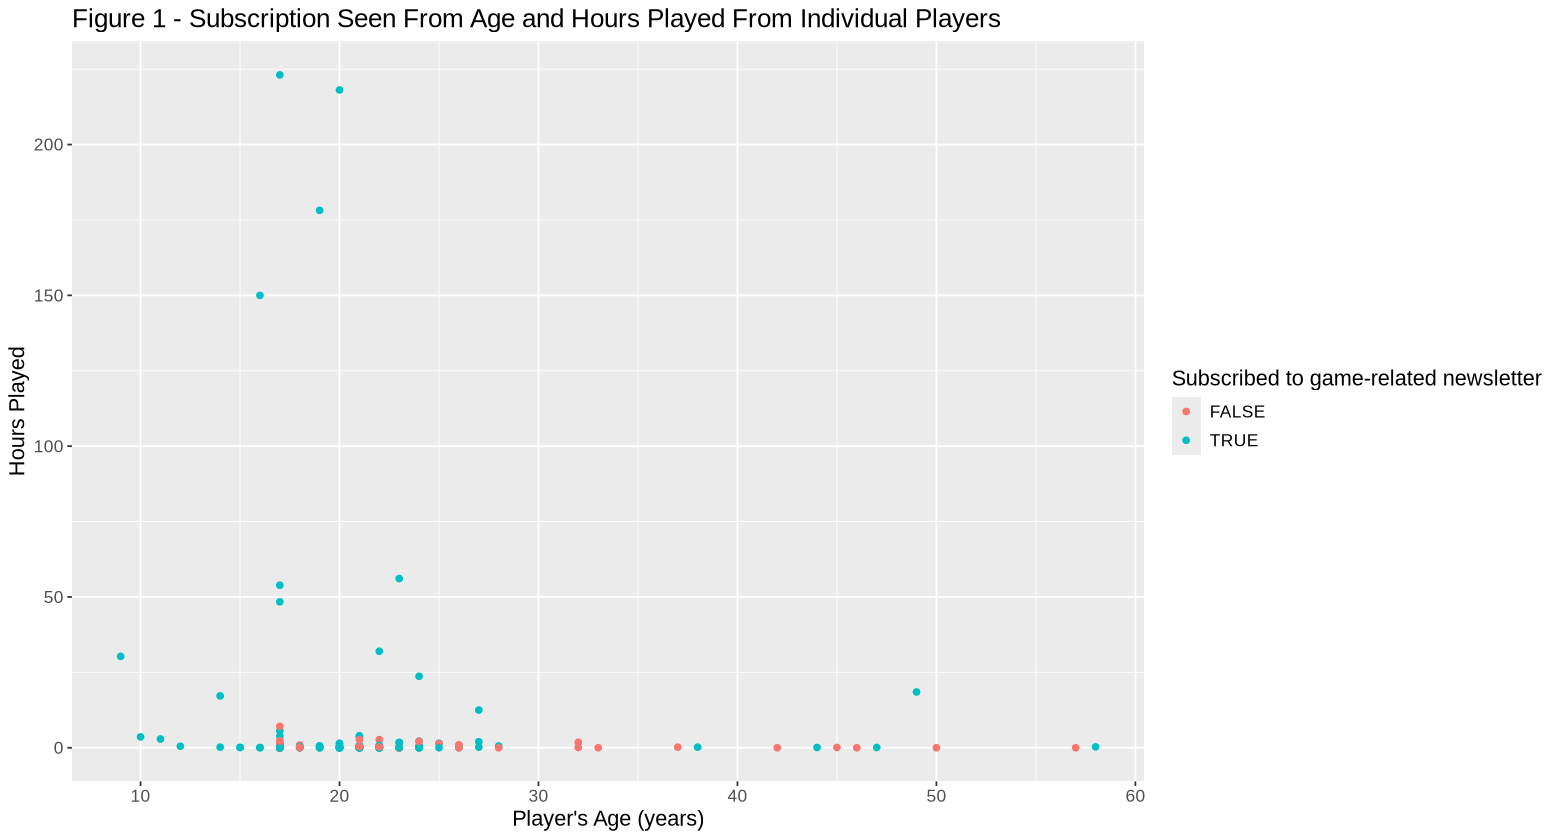

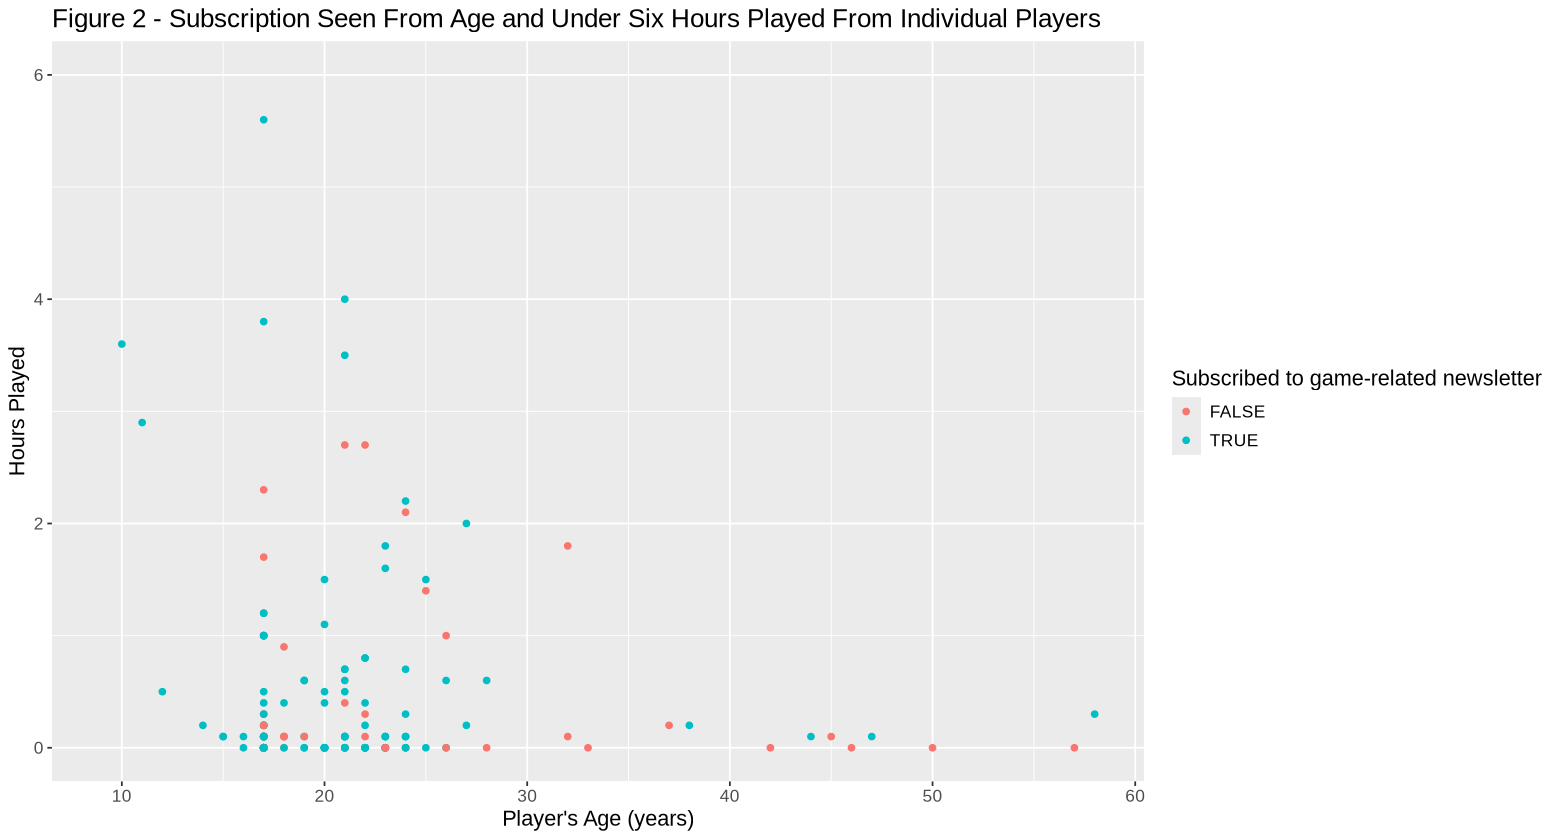

In [18]:
# visualization explores distribution of players subscribed to newsletter by age

options(repr.plot.width = 13)

exploratory_plot1 <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Player's Age (years)", y = "Hours Played", title = "Figure 1 - Subscription Seen From Age and Hours Played From Individual Players", color = "Subscribed to game-related newsletter") +
    theme(text = element_text(size = 13))
exploratory_plot1

exploratory_plot2 <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Player's Age (years)", y = "Hours Played", title = "Figure 2 - Subscription Seen From Age and Under Six Hours Played From Individual Players", color = "Subscribed to game-related newsletter") +
    theme(text = element_text(size = 13))+
    ylim(0,6)
exploratory_plot2

The unscaled data in the scatterplot above (Figure 1) shows hours of the video game played vs the player's age. The colour of a dot (blue = subscribed, orange = not subscribed) represents whether or not the player has subscribed to a game-related newsletter. Since our goal is to predict whether a player will subscribe to a game-related newsletter based on the player's age and the number of hours they played the game for, the plot can help estimate whether or not a player will subscribe. If a new point was placed on the scatterplot, one can observe the class of the points closest to it and make a estimate of the new point's class. Figure 2 meanwhile excludes the outliers whose hours played are more than 1the average amount of hours, rounded to 6. By removing these outliers it is easier to see the small differences in value between the majority of players. These outliers will be fixed once the data is scaled, but for visualization purposes, 2 graphs have been shown.

In [19]:
# set the seed
set.seed(1)

# creating train / test split
players_split <- initial_split(players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

The players dataset is split into a testing and training set to train the algorithm and then tested for accuracy. KNN will classify a new data point based on how its nearest neighbours are classified. This method is appropriate because it would provide a clear visual answer to a prediction question. 

First, a KNN classification with k = 3 will be performed to inspect how our classification works. The model will be tuned later to find the best k value. 

In [7]:
# preprocessing
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#creating a model specification with k = 3
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

#fitting model to training data
knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4482759
Best kernel: rectangular
Best k: 3

In [8]:
#obtaining the accuracy for k = 3
players_test_predictions <- predict(knn_fit, players_test) |>
    bind_cols(players_test)

players_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

players_test_predictions |> pull(subscribe) |> levels()

#obtaining the precision and recall for k = 3
# positive label ('TRUE') is second level
players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second") 

players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5918367


[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7222222


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.7222222


In [20]:
#creating the confusion matrix for k = 3
confusion <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)

confusion


          Truth
Prediction FALSE TRUE
     FALSE     3   10
     TRUE     10   26

With a k of 3, the accuracy is 59%, the precision is 72%, and recall is 72%. None of these values are very high. To predict whether players will subscribe to a newletter, a high accuracy and precision value would be important. A high accuracy and precision would mean that the machine has an overall high score in correct predictions, so having the values currently be this low indicates that the algorithm is not very accurate or precise and thus a better k value should be found to better train the model. The confusion matrix shows that the algorithm currently often fails to predict `FALSE` subscriptions, while it is more accurate in predicting `TRUE` subscriptions. This is likely due to more players in the dataset generally being subscribed then not subscribed, and a poor k value, all of which are skewing the data. 

In [10]:
#prediction results using k = 3
new_obs <- tibble(Age = c(21, 9, 30, 40, 40, 15, 20), played_hours = c(10, 0, 20, 5, 40, 0, 0))
prediction <- predict(knn_fit, new_obs) |> 
mutate(observation = row_number())
prediction

.pred_class,observation
<fct>,<int>
TRUE,1
TRUE,2
TRUE,3
FALSE,4
TRUE,5
TRUE,6
FALSE,7


Using the current k value of 3, 7 prediction tables have been made with a range of ages and hours played to try and predict the players subscription level. because of the low accuracy of the machine, much of the predictions state true. This is apparent in observation 2, where the player is 9 and plays for 0 hours, yet is still subscribed. Or in observation 4, where the player is 40 and plays for 30 hours, yet is not subscribed. This lack of accuracy and precision does not give a clear prediction on how age and played hours will affect a players subscription, which would result in bad conclusions if it were used. A better k should be found for better predictions.

In [11]:
set.seed(1)
#finding best k between k = 1 and k = 50
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

#performing 5-fold cross validation
training_5_fold <- vfold_cv(players_train, v = 5, strata = subscribe)

#tuning the model specification
tune_spec <- nearest_neighbor(weight_func = "rectangular", mode = "classification", neighbors = tune()) |> 
                    set_engine("kknn") |> set_mode("classification")

#adding to workflow
cross_val <- workflow() |> 
    add_recipe(players_recipe) |> 
    add_model(tune_spec) |> 
    tune_grid(resamples = training_5_fold, grid = k_vals)

#collecting first few accuracy values for k between 1 and 50
cross_val_metrics <- collect_metrics(cross_val)

accuracies <- cross_val_metrics |> filter(.metric == "accuracy") 
head(accuracies)                                                                                                      

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4903448,5,0.02283165,Preprocessor1_Model01
2,accuracy,binary,0.4903448,5,0.02283165,Preprocessor1_Model02
3,accuracy,binary,0.5517241,5,0.03893652,Preprocessor1_Model03
4,accuracy,binary,0.5521839,5,0.04564043,Preprocessor1_Model04
5,accuracy,binary,0.5383908,5,0.03112078,Preprocessor1_Model05
6,accuracy,binary,0.5312479,5,0.03400932,Preprocessor1_Model06


A 5-fold cross validation has been used to split the overall training data into 5 chunks where 1 is used as a validation set and combining the others into a training set. Using this 5-fold decreases the standard error. The same recipe from before is used, while a new spec is created for parameter value selection, with `tune()` used as the parameter rather than a particular value to explore which k value and identify what brings about the best results. `k_vals` will create a dataframe with neighbours ranging from 1-50 (stepping by 1). All are added together in `cross_val`, with `tune_grid` used to fit each value in a range of parameters. The best k value will be found in a graph and pulling from the accuracy table above, this can be seen below.

[1] 21

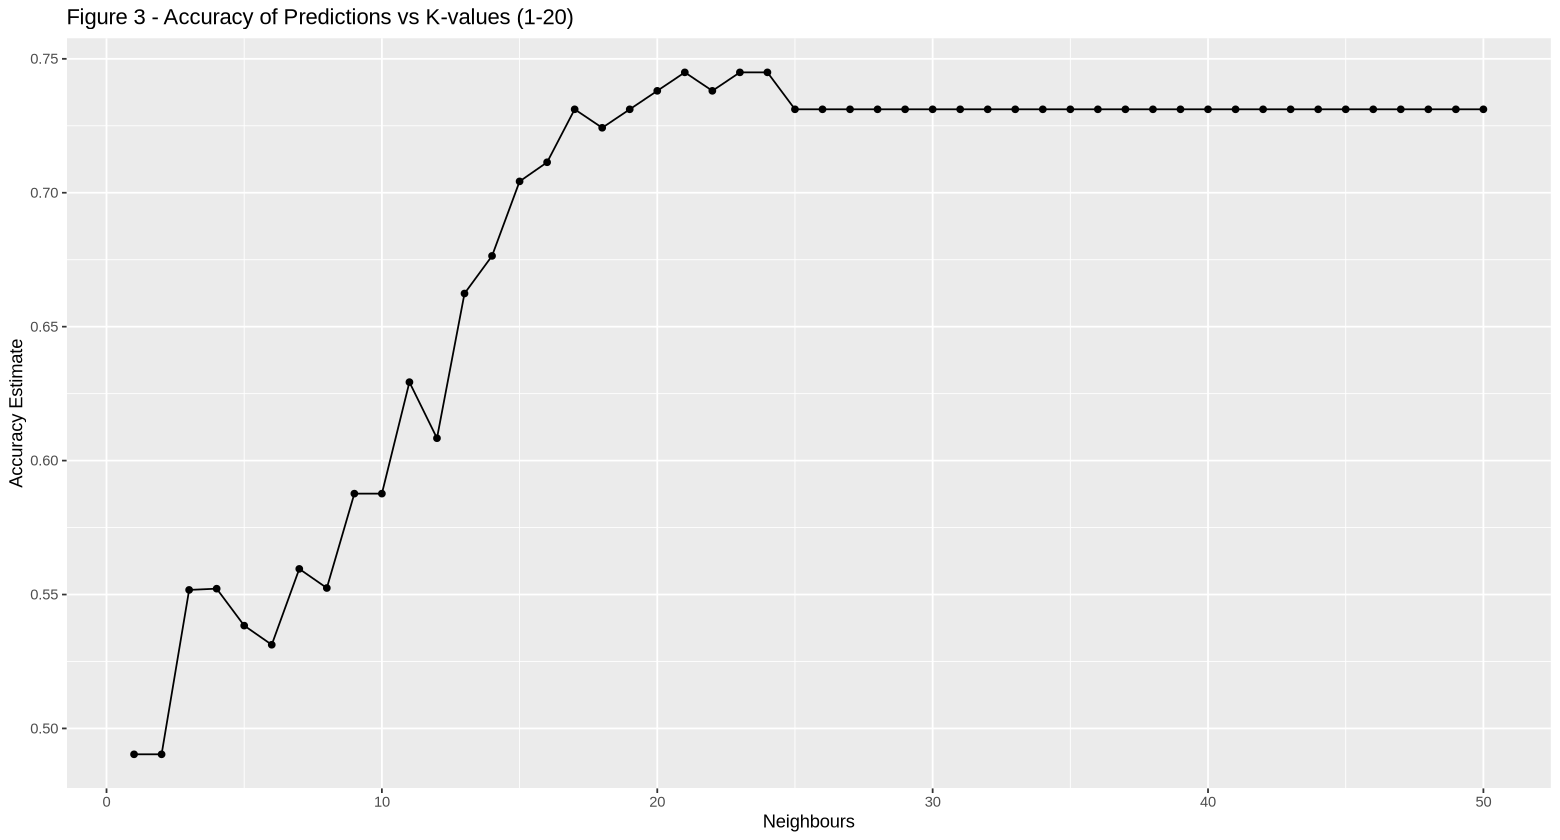

In [16]:
cross_val_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) + geom_point() + geom_line() +
           labs(x = "Neighbours", y = "Accuracy Estimate", title = "Figure 3 - Accuracy of Predictions vs K-values (1-20)") 
cross_val_plot

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

According to the plot, the best k value to use is 21, 23, or 24. 21 will be used as there would be no noticeable difference by making the value larger. This is shown as well by the best k pulled from the accuracies, which states 21. This value sets the highest cross-validation accuracy estimate. The graphs accuracy estimate value hits 25 neighbours and remains at a set value until the end of the graph. This is likely because past a certain point the algorithm assumes that everyone is subscribed due to the high amount of players in the dataset that are already subscribed.

In [21]:
#add recall and precision for best K-value spec

# creating model with best k-value
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
  set_engine("kknn") |>
  set_mode("classification")

# fitting the model to the training data
knn_best_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = players_train)

knn_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 21

In [14]:
#obtaining accuracy for best k (k = 21)
best_players_test_predictions <- predict(knn_best_fit, players_test) |>
    bind_cols(players_test)

best_players_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

best_players_test_predictions |> pull(subscribe) |> levels()

# positive label ('TRUE') is second level

# obtaining precision for best k (k = 21)
best_players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second") 

# obtaining recall for best k (k = 21)
best_players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7446809


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9722222


The model has been re-fitted using 21 as the k value, the same recipe from before has been reused. The accuracy is now 73%, the precision is now 74%, and recall is now 97%. All have been increased, but in particular accuracy and recall. These improvements mean that the machine produces better results for predicting if a player is subscribed based on age and hours played.

In [15]:
#prediction results using best k (k = 21)
new_best_obs <- tibble(Age = c(21, 9, 30, 40, 40, 15, 20), played_hours = c(10, 0, 20, 5, 40, 0, 0))
prediction_best <- predict(knn_best_fit, new_best_obs) |> 
mutate(observation = row_number())
prediction_best

.pred_class,observation
<fct>,<int>
TRUE,1
TRUE,2
TRUE,3
FALSE,4
TRUE,5
TRUE,6
TRUE,7


## Discussion
The results concluded that while higher hours played is important, age appears to be a significant contributor to whether or not players will subscribe to a gaming-related newsletter. Potential weaknesses in the dataset could come from the outliers in hours played, where certain users have significantly more hours than the majority, which could skew the predictions. Hours played and age were thus scaled to be normalized. Those who are younger (below 25) are more likely to be subscribed no matter how many hours they’ve played, while those who are older are far less likely to subscribe, even if they have played quite a bit. This is not expected, as it was thought that more hours played would correlate to subscription more than the age of players. This could be because age is far more important for subscription, or because 75% of participants in the dataset were subscribed which would affect the predictions more towards favouring subscription. The average age is also around 21, so ages closer to that average in predictions would be more likely to subscribe, as this is an average of most of the player bases age, 75% of this database which is subscribed. This would skew predictions towards subscribing the lower the age, despite hours played. However, this could be beneficial. This is because younger players likely have a higher computer literacy and are more likely to spend time on the computer. This could indicate that despite hours played, they would be far more likely to sign up for a newsletter online. These findings would indicate that younger people are more interested in subscription to gaming newspapers than older people. These newsletters then should be targeted towards younger people, with more emphasis on their age rather than whether or not they play a lot of Minecraft. Future questions derived from this data could be: does experience matter more than hours played or age? How many hours played would an older individual have to play to be predicted to subscribe?


## References
He, Yingchen., et all. "PLAICraft: Large-Scale Time-Aligned Vision-Speech-Action Dataset for Embodied AI". Pacific Laboratory for Artificial Intelligence (PLAI), UBC, 2025. https://arxiv.org/pdf/2505.12707 